# MNIST DATASET

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9

# IMPORTING LIBRARIES AND LOADING DATASET

In [30]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array

# PREPROCESSING THE DATA

In [2]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


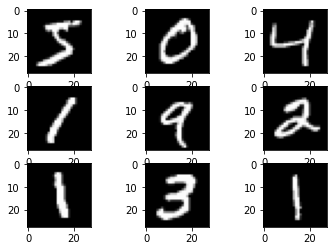

In [3]:
# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

# CREATING THE MODEL

In [4]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# TRAINING THE MODEL

In [5]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 140s 291ms/step - loss: 0.1851 - accuracy: 0.9437 - val_loss: 0.0507 - val_accuracy: 0.9833
Epoch 2/10
469/469 [==============================] - 137s 293ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0317 - val_accuracy: 0.9899
Epoch 3/10
469/469 [==============================] - 145s 309ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0282 - val_accuracy: 0.9902
Epoch 4/10
469/469 [==============================] - 131s 280ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0317 - val_accuracy: 0.9895
Epoch 5/10
469/469 [==============================] - 141s 301ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0335 - val_accuracy: 0.9899
Epoch 6/10
469/469 [==============================] - 147s 314ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0269 - val_accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 144s 308ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0275 -

# EVALUATING THE MODEL

In [6]:
acc= model.evaluate(x_test, y_test, verbose=0)
acc

[0.029090579599142075, 0.9923999905586243]

In [7]:
scores, histories = list(), list()
scores.append(acc)
histories.append(hist)

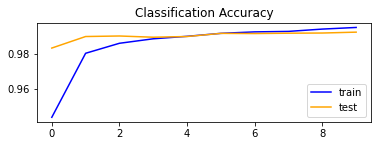

In [8]:
# Plot Accuracy
for i in range(len(histories)):
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.legend()

plt.show()

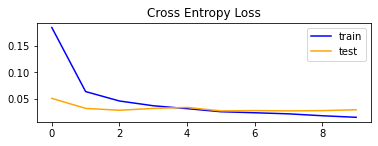

In [9]:
# Plot Loss
for i in range(len(histories)):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    plt.legend()

Text(69.0, 0.5, 'true')

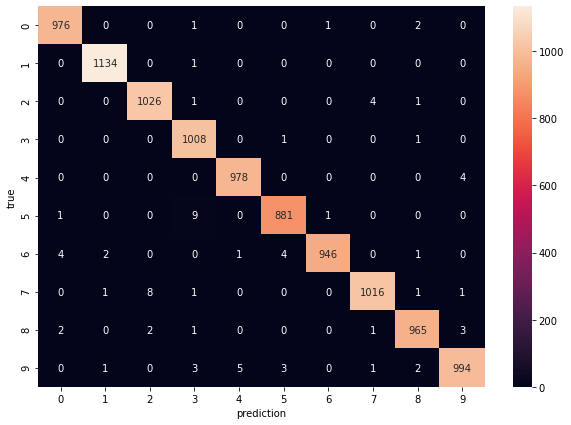

In [10]:
y_pred = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("prediction")
plt.ylabel("true")

# PREDICTION FOR LOAD IMAGE

In [11]:
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

##### load and prepare the image

In [27]:
def load_image(filename):
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    img = img_to_array(img)
    print("This is Checking image: ", plt.imshow(img))
    plt.show()
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    return img

##### load an image and predict the class

This is Checking image:  AxesImage(54,36;334.8x217.44)


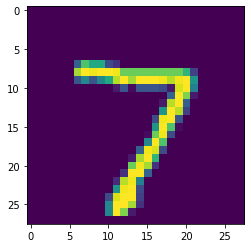

Predicting value of the image:  7


In [29]:
def prediction():
    img = load_image('sample_image.png')
    model=load_model('mnist.h5')
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print("Predicting value of the image: ", digit)
    
prediction()    

# Conclusion :


 - Loaded image is extracted from the MNIST test dataset, save it in our current working directory with the filename "sample_image.png". Running the example first loads and prepares the image, loads the model, and then correctly predicts that the loaded image represents the digit ‘7‘.
 - The classification accuracy for the model on the test dataset is calculated, we can see that the model achieved an accuracy of 99.15%.

